<a href="https://colab.research.google.com/github/sharonvarghesesv/projects-related-to-ML-DL/blob/main/data_science_community_srm_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Dataset 1/train data',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2382 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Dataset 1/test data',
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1116 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x=training_set,validation_data =test_set, epochs = 25)

Epoch 1/25
75/75 [==============================] - 88s 1s/step - loss: 0.4855 - accuracy: 0.8342 - val_loss: 0.2368 - val_accuracy: 0.9086
Epoch 2/25
75/75 [==============================] - 65s 864ms/step - loss: 0.2240 - accuracy: 0.9160 - val_loss: 0.2178 - val_accuracy: 0.9113
Epoch 3/25
75/75 [==============================] - 55s 728ms/step - loss: 0.1575 - accuracy: 0.9400 - val_loss: 0.1196 - val_accuracy: 0.9597
Epoch 4/25
75/75 [==============================] - 53s 700ms/step - loss: 0.1277 - accuracy: 0.9526 - val_loss: 0.1104 - val_accuracy: 0.9588
Epoch 5/25
75/75 [==============================] - 54s 713ms/step - loss: 0.1437 - accuracy: 0.9479 - val_loss: 0.1087 - val_accuracy: 0.9561
Epoch 6/25
75/75 [==============================] - 53s 703ms/step - loss: 0.1269 - accuracy: 0.9555 - val_loss: 0.1004 - val_accuracy: 0.9677
Epoch 7/25
75/75 [==============================] - 59s 777ms/step - loss: 0.1005 - accuracy: 0.9647 - val_loss: 0.1245 - val_accuracy: 0.9516
Ep

In [ ]:
import pandas as pd
loss=pd.DataFrame(cnn.history.history)


<AxesSubplot:>

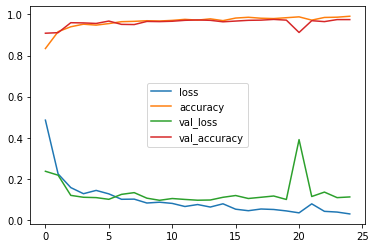

In [ ]:
loss.plot()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:/Users/hp/Downloads/FOREST SAMPLE (1).jpg", target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'forest'
else:
    prediction = 'building'

1/1 [==============================] - 0s 56ms/step


In [ ]:
print(prediction)

forest
